----------------------------------

# Visão Geral

- Leitura: 30 min

### Requisitos:
- Conhecimentos básicos da linguagem Python
- Conhecimentos básicos em Notebook Jupyter

### Conteúdo:
1. Noções básicas de imagens digitais
2. Operações básicas em Python

---------------------------


###     1. Noções básicas de imagens digitais

As imagens visualizadas em dispositivos eletrônicos ou processadas em programas são representadas e armazenadas no computador por meio de abstrações númericas, que simulam a visão humana do mundo real.

Antes de aprender a realizar o processamento de imagens com python é necessários dedicar algum tempo para entender como essas abstrações funcionam.

####    1.1 Definição dos termos bit e byte

Antes de abordar, especificamente, o assunto sobre imagens digitais, é preciso entender como os números são armazenados em um computador. 

Geralmente, os números são representados no sistema de números decimais ou com valor de base 10. No entanto, a construção de um circuito eletrônico para representar dez estados diferentes é complexo, sendo mais fácil construir circuitos que se restrigem a uma base númerica de dois valores (É mais fácil um circuito diferenciar dois níveis de tensão do que diferenciar 10 níveis). Portanto, os valores em um computador são armazenados usando um sistema de números binários ou de valor de base 2.

Nesse sistema, cada símbolo em um número é chamado de bit, em vez de um dígito, e existem apenas dois valores para cada bit (0 e 1). Por exemplo, o número 13 em binário é representado da seguinte forma: 1101, na qual cada bit ativo (1) na representação é somado para obter o número decimal, o valor a ser somado em cada posição é obtido elevando a base 2 ao índice do bit da direita para esquerda,como mostra a tabela a seguir:

Posição  | 3 | 2 | 1 | 0 |
-------: |--:|--:|--:|--:|
**Base** | 2³| 2²| 2¹| 2⁰

13 = 2³ + 2² + 2⁰ = 1101 (bits)

Internamente, os computadores têm um número mínimo de bits com os quais trabalham em um determinado momento: oito. Um grupo de oito bits é chamado de **byte**.



#### 1.2    Pixels

As imagens digitais são armazenadas como matrizes retangulares de centenas, milhares ou milhões de "elementos de imagem" discretos, também conhecidos como pixels. Cada pixel representa um nível de intensidade de luz colorida.

O nível de intensidade de um pixel, geralmente, é representado por 8 bits, podendo variar entre 0 e 255.

#### 1.3    Sistema de Coordenadas

Para acessar os pixels de uma imagem digital é utilizado um sistema de coordenadas cartesiano modificado. Este sistema modificado permite apenas valores positivos de coordenadas e possui apenas dois eixos x (horizontal) e y (vertical-invertido), como pode ser observado na figura abaixo:


<img src="../figures/intensidade_pixel.jpg" align="center" alt="" width="70%"/>

A função bidimensional f(x, y) representa a intensidade de um pixel em um determinado ponto.

####    1.4 Modelo de Cor

Os modelos de cores permitem que imagens digitais apresentem um ampla variedade de cores a partir de um pequeno conjunto de cores primárias. Apresar de existirem vários modelos de cores diferentes, o mais comum é o modelo RGB (red, green e blue).

O modelo RGB é um modelo de cores aditivo, o que significa que as cores primárias são misturadas para formar outras cores. Geralmente, as cores primárias são denominadas de canais, na qual canal representa uma quantidade de cor primária em um intervalo de 0 à 255, ou seja, existem 256 valores possível para cada canal de cor. Este valor é obtido pelo número de bits usados para armazenar o valor do canal de cores, no caso de 256 possibilitades são utilizados 8 bits. Como o modelo RGB possui três canais (vermelho, verde e azul), é dito que a profundidade de cores é de 24 bits (8 para cada canal).

Qualquer cor específica no modelo RGB pode ser definida por um trio de números inteiros entre 0 e 255. Quanto maior o valor de um canal, maior será presença daquela cor na mistura final dos canais.

#### 1.5 Imagem Digital em Tons de Cinza

Uma imagem digital em tons de cinza é uma imagem que possui apenas um canal de cor. Os valores podem varia de 0 à 255, na qual 0 representa a cor preta (ou ausência de cor) e 255 a cor branca (ou junção de todas as cores).

### 2. Operações básicas em Python

#### 2.1 Leitura e escrita de um imagem em python com a biblioteca OpenCV

In [1]:
# Importação da biblioteca opencv
import cv2
print("Opencv.:" + cv2.__version__)

Opencv.:4.2.0


In [2]:
# Leitura da imagem com a função imread()
imagem = cv2.imread('../../figures/gato.jpg')

# A biblioteca opencv abre a imagem com os canais no formato BGR (blue, green, red)
# Converte os canais da imagem para o formato RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

In [3]:
# Mostrando as propriedades da imagem
print("Largura em pixels: ", imagem.shape[1])
print("Altura em pixels: ", imagem.shape[0])
print("Quantidade de canais: ", imagem.shape[2])

Largura em pixels:  640
Altura em pixels:  393
Quantidade de canais:  3


#### 2.2 Mostrando uma imagem em Python com a biblioteca Matplotlib

In [4]:
# Importação da biblioteca matplotlib
from matplotlib import pyplot as plt

A biblioteca Matplotlib é biblioteca de plotagem para Python, que oferece uma grande variedade de métodos de plotagem.

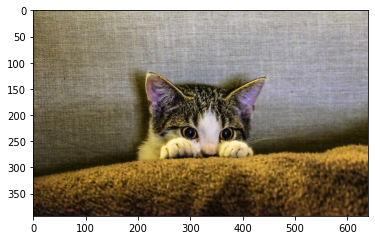

In [5]:
# Mostrando a imagem
plt.imshow(imagem)

#### 2.3 Salvando a imagem 

In [6]:
cv2.imwrite("../../figures/gato-salvo.jpg", cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

True

#### 2.4 Manipulação dos pixels de uma imagem

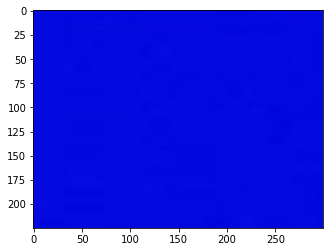

In [7]:
# Lendo a figura vermelho.jpg
imagem = cv2.imread('../../figures/vermelho.jpg')

# mostrando a figura vermelho.jpg
plt.imshow(imagem)

A figura vermelho.jpg é exibida com a cor azul, pois a biblioteca opencv abre as imagens com o formato BGR e a biblioteca matplotlib interpreta as imagem com o formato RGB. A cor predominante na figura é azul pois os canais de cores RED e BLUE estão invertidos.

Para corrigir isto é necessário converte a imagem para o formato RGB.

In [8]:
# Os pixels da imagem estão em formato BGR
(b, g, r) = imagem[0, 0]
print("Valores dos pixels em BGR:")
print("Azul:", b, "Verde:", g, "Vermelho:", r)

Valores dos pixels em BGR:
Azul: 2 Verde: 10 Vermelho: 224


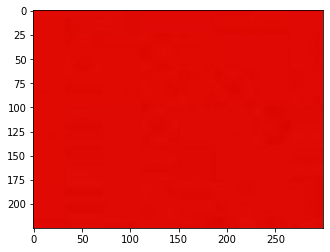

In [9]:
# invertendo os canais RED e BLUE
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

#### 2.5 Modificando os pixels de uma imagem

##### 2.5.1 Neste seção, a figura vermelho.jpg vai ser modificada para ficar com a coloração predominante verde.

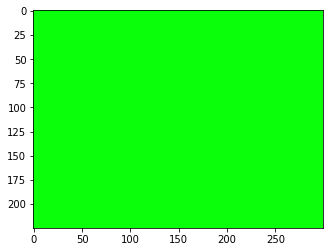

In [10]:
imagem = cv2.imread('../../figures/vermelho.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# y eixo da altura da imagem
# x eixo da largura da imagem
for y in range(0, imagem.shape[0]):
    for x in range(0, imagem.shape[1]):
        # atribuindo o maior valor para o canal green
        imagem[y, x] = (10, 255, 10) # red, green, blue

plt.imshow(imagem)

##### 2.5.2 Nesta seção, serão criados pequenos pontos quadrados na figura gato.jpg com a coloração rosa (vermelho + azul)

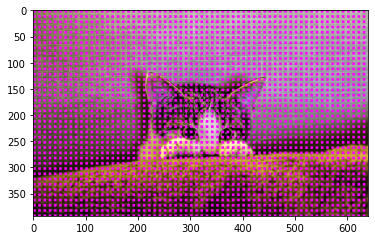

In [11]:
imagem = cv2.imread('../../figures/gato.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# y eixo da altura da imagem
# x eixo da largura da imagem
for y in range(0, imagem.shape[0], 10):
    for x in range(0, imagem.shape[1], 10):
        imagem[y:y+5, x:x+5] = (255, 0, 255) # red, green, blue

plt.imshow(imagem)

O código acima salta a cada 10 pixels ao percorrer as linhas e colunas da imagem. A cada salto é criado um quadrado rosa de 5x5 pixels. Desta vez parte da imagem original é preservada e podemos ainda observar o gato por baixo da grade de quadrados rosas.

**Observação**: Os quadrados rosas são gerados acessandos os pixels por meio de fatiamento (*slicing*) definido pelo intervalo y:y+5 e x:x+5.

# Apoio

Universidade Tecnólogica Federal do Paraná - UTFPR

# Referências

- Documentação do OpenCV (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)

- Antonello, R. (2014). Introdução a Visão Computacional com Python e OpenCV. Engenharia de Controle e Automação do Instituto Federal Catarinense–IFC, campus Luzerna.

- Brilhador, A. (2015). Análise semi-automática do arranjo espacial de plantas de milho utilizando visão computacional (Master's thesis, Universidade Tecnológica Federal do Paraná).

- Lições para pesquisadores de Data Carpentry (https://datacarpentry.org/image-processing/02-image-basics/index.html).

- Todas imagens usadas neste projeto foram obtidas do site pixabay.com com licença de domínio público ou foram obtidas das referências descritas nas lições.